In [7]:
import torch
import yolov5
import torch.nn as nn
import cv2
from torchvision import transforms
from PIL import Image
import joblib
import sklearn

In [8]:
# Niclas sätt att importera yolov5
model_path = "./saved_models/fish_model_yolov5_23-12-20.pt"
fish_model = yolov5.load(model_path)
fish_model.conf = 0.14

YOLOv5  2024-1-19 Python-3.10.7 torch-2.1.2+cpu CPU

Fusing layers... 
custom_YOLOv5s summary: 283 layers, 7255094 parameters, 0 gradients
Adding AutoShape... 


#### Fish Model

In [ ]:
# yolo_path = "C:/Users/emmel/Desktop/testning av yolov5/yolov5"
# model_path = "./saved_models/fish_model_yolov5_23-12-20.pt"

# fish_model = torch.hub.load(yolo_path, 'custom', path=model_path, source='local')
# fish_model.conf = 0.10

#### Sick Fish Model
Exempelkod för att ladda den modell vi väl använder:

In [10]:
#sick_model = joblib.load("./saved_models/my_random_forest.joblib")
loaded_model = load_model('./saved_models/cnn_model_original_data_10-1-24.h5')

ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

#### Testbild

In [90]:
def random_image(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    if not image_files:
        print("Inga bilder hittades i mappen.")
        return None

    random_image = random.choice(image_files)

    img_path = os.path.join(folder_path, random_image)

    return img_path

In [258]:
folder_path = './dataset/test_img/Healthy_fishies/Sea Bass/'
test_image_path = random_image(folder_path)
image_path = "./dataset/test_img/Healthy_fishies/Red Mullet/00142.png"
original_image = cv2.imread(test_image_path)
image = Image.fromarray(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

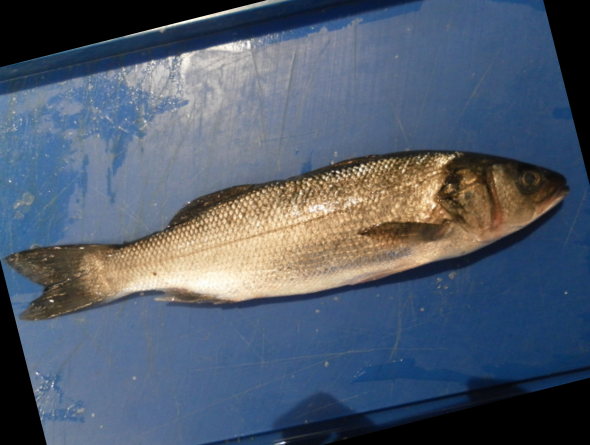

In [259]:
display(image)

In [260]:
yolo_result = fish_model(image)
yolo_preds = yolo_result.pandas().xyxy[0]

In [261]:
predictions = yolo_result.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

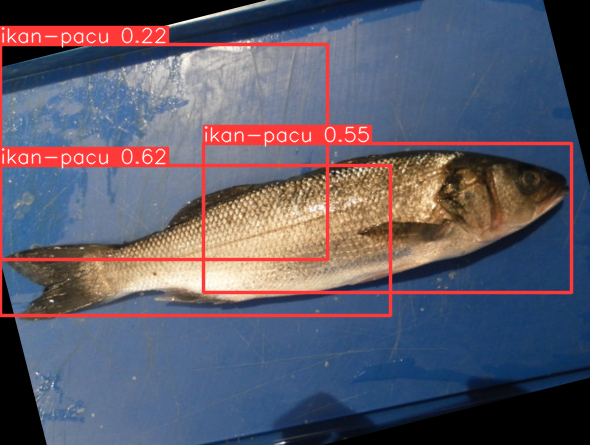

In [262]:
yolo_result.show()

In [55]:
display(original_image)

array([[[ 77,  86,  89],
        [100, 104, 105],
        [ 96,  87,  90],
        ...,
        [ 16,  31,  10],
        [  6,  18,   0],
        [ 29,  41,  23]],

       [[115, 118, 122],
        [103, 102, 104],
        [ 88,  82,  83],
        ...,
        [ 29,  44,  23],
        [ 11,  23,   5],
        [ 54,  66,  48]],

       [[ 90,  81,  84],
        [ 88,  81,  84],
        [ 78,  73,  74],
        ...,
        [ 14,  29,   8],
        [ 11,  25,   7],
        [ 23,  37,  19]],

       ...,

       [[ 53,  58,  56],
        [ 42,  45,  43],
        [ 29,  27,  27],
        ...,
        [ 37,  53,  35],
        [ 45,  63,  40],
        [ 16,  37,  12]],

       [[ 13,  20,  15],
        [ 22,  26,  21],
        [ 37,  32,  31],
        ...,
        [ 12,  31,  10],
        [ 13,  33,  10],
        [ 10,  32,   7]],

       [[ 13,  20,  15],
        [ 11,  15,  10],
        [ 35,  27,  27],
        ...,
        [ 64,  83,  62],
        [ 41,  63,  39],
        [ 56,  78,  53]]

In [240]:
loaded_model = load_model('./saved_models/cnn_model_more_data_17-1-24.h5')

In [106]:
def prepare_images(file_paths, target_size=(64, 64)):
    images = []
    for path in file_paths:
        img = load_img(path, target_size=target_size)
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

In [265]:
test_image = prepare_images([test_image_path])

# Gör prediktion med modellen
prediction = loaded_model.predict(test_image)

# Bestäm förutsagd klass och spara i listor
predicted_class_index = np.argmax(prediction[0])
class_labels = ["Diseased", "Healthy"]
predicted_class_label = class_labels[predicted_class_index]
confidence_score = prediction[0][predicted_class_index]

print(predicted_class_label, confidence_score)

1/1 [==============================] - 0s 13ms/step
Healthy 1.0


### Lets go!

         xmin        ymin        xmax        ymax  confidence  class  \
0    0.645211  165.641953  390.393585  315.640533    0.615489      0   
1  203.063431  143.438156  571.851196  292.271606    0.553040      0   
2    0.000000   44.446899  327.984375  259.891022    0.216493      0   

        name  
0  ikan-pacu  
1  ikan-pacu  
2  ikan-pacu  
Fish detected
0 165 390 315


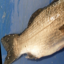

1/1 [==============================] - 0s 17ms/step
Diseased 0.9589545
203 143 571 292


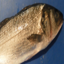

1/1 [==============================] - 0s 17ms/step
Diseased 0.9570634
0 44 327 259


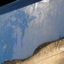

1/1 [==============================] - 0s 15ms/step
Diseased 0.9525547


In [264]:
yolo_result = fish_model(image)
yolo_preds = yolo_result.pandas().xyxy[0]

print(yolo_preds)

if len(yolo_preds) > 0:
    print(f"Fish detected")
    
    for _, yolo_pred in yolo_preds.iterrows():
        bbox = yolo_pred[['xmin', 'ymin', 'xmax', 'ymax']].astype(int).tolist()
        # roi = original_image[bbox[1]:bbox[3], bbox[0]:bbox[2]]
        print(bbox[0],bbox[1], bbox[2],bbox[3])
        crop_coordinates = (bbox[0],bbox[1],bbox[2],bbox[3])
        cropped_image = image.crop(crop_coordinates)
        cropped_image = cropped_image.resize((64, 64))

        display(cropped_image)

        cropped_image_array = np.array(cropped_image) / 255
        cropped_image_array = np.expand_dims(cropped_image_array, axis=0)  # Lägg till en extra dimension för batch

    second_model_output = sick_model.predict([roi])

        print(predicted_class_label, confidence_score)

        # Preprocessing för sick model  

        # second_model_output = sick_model.predict([........])

        # print(f"Prediction for ROI: Class {second_model_output[0]}")

else:
    print(f"No fish detected")
